In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [83]:
#loading the dataset                                                #tab delimiter
df=pd.read_csv('/kaggle/input/gas-prices-in-brazil/2004-2021.tsv',delimiter='\t')
#showing the dataset
df

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [85]:
#checking for missing values in the dataset
df.isna().sum()

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

# Preprocessing the Dataset

In [86]:
UNNEEDED_COLUMNS=['DATA INICIAL','DATA FINAL']
df=df.drop(UNNEEDED_COLUMNS,axis=1)
df

,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120818,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


# Class Visualization

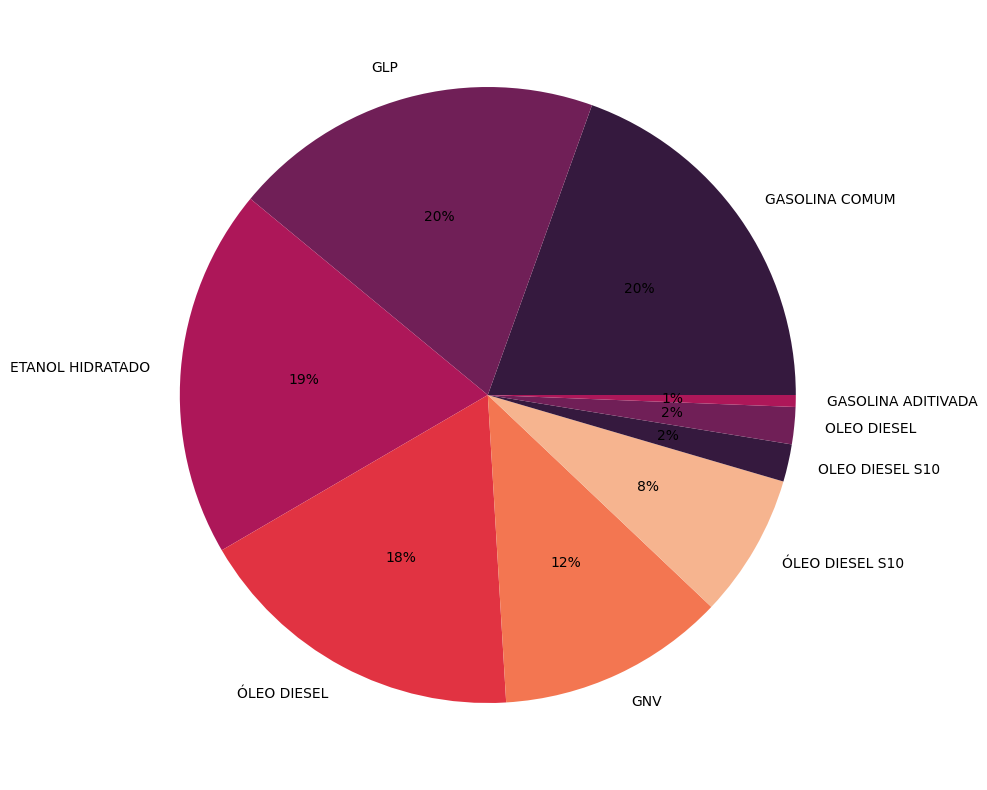

In [87]:
plt.figure(figsize=(15,10))
plt.pie(x=df['PRODUTO'].value_counts(),labels=df['PRODUTO'].value_counts().index,colors=sns.color_palette('rocket'),autopct='%.f%%')
plt.show()

# Encoding the Dataset

In [88]:
df

,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120818,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


In [89]:
label_encoder=LabelEncoder()

df['PRODUTO']=label_encoder.fit_transform(df['PRODUTO'])

In [90]:
dict(enumerate(label_encoder.classes_))

{0: 'ETANOL HIDRATADO',
 1: 'GASOLINA ADITIVADA',
 2: 'GASOLINA COMUM',
 3: 'GLP',
 4: 'GNV',
 5: 'OLEO DIESEL',
 6: 'OLEO DIESEL S10',
 7: 'ÓLEO DIESEL',
 8: 'ÓLEO DIESEL S10'}

In [91]:
[column for column in df.columns if df[column].dtype=='object']

['REGIÃO',
 'ESTADO',
 'UNIDADE DE MEDIDA',
 'MARGEM MÉDIA REVENDA',
 'PREÇO MÉDIO DISTRIBUIÇÃO',
 'DESVIO PADRÃO DISTRIBUIÇÃO',
 'PREÇO MÍNIMO DISTRIBUIÇÃO',
 'PREÇO MÁXIMO DISTRIBUIÇÃO',
 'COEF DE VARIAÇÃO DISTRIBUIÇÃO']

In [92]:
def onehot_encode(df,columns):
    df=df.copy()
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [93]:
df=onehot_encode(df,['REGIÃO','ESTADO','UNIDADE DE MEDIDA'])

In [94]:
for column in df.columns:
    if df[column].dtype=='bool':
        df[column]=df[column].astype(int)

In [102]:
df.isin(["-"]).sum()

PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             3431
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         3400
DESVIO PADRÃO DISTRIBUIÇÃO       3400
PREÇO MÍNIMO DISTRIBUIÇÃO        3400
PREÇO MÁXIMO DISTRIBUIÇÃO        3400
COEF DE VARIAÇÃO DISTRIBUIÇÃO    3400
REGIÃO_CENTRO OESTE                 0
REGIÃO_NORDESTE                     0
REGIÃO_NORTE                        0
REGIÃO_SUDESTE                      0
REGIÃO_SUL                          0
ESTADO_ACRE                         0
ESTADO_ALAGOAS                      0
ESTADO_AMAPA                        0
ESTADO_AMAZONAS                     0
ESTADO_BAHIA                        0
ESTADO_CEARA                        0
ESTADO_DISTRITO FEDERAL             0
ESTADO_ESPIRITO SANTO               0
ESTADO_GOIAS

In [101]:
df

,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,REGIÃO_CENTRO OESTE,REGIÃO_NORDESTE,REGIÃO_NORTE,REGIÃO_SUDESTE,REGIÃO_SUL,ESTADO_ACRE,ESTADO_ALAGOAS,ESTADO_AMAPA,ESTADO_AMAZONAS,ESTADO_BAHIA,ESTADO_CEARA,ESTADO_DISTRITO FEDERAL,ESTADO_ESPIRITO SANTO,ESTADO_GOIAS,ESTADO_MARANHAO,ESTADO_MATO GROSSO,ESTADO_MATO GROSSO DO SUL,ESTADO_MINAS GERAIS,ESTADO_PARA,ESTADO_PARAIBA,ESTADO_PARANA,ESTADO_PERNAMBUCO,ESTADO_PIAUI,ESTADO_RIO DE JANEIRO,ESTADO_RIO GRANDE DO NORTE,ESTADO_RIO GRANDE DO SUL,ESTADO_RONDONIA,ESTADO_RORAIMA,ESTADO_SANTA CATARINA,ESTADO_SAO PAULO,ESTADO_SERGIPE,ESTADO_TOCANTINS,UNIDADE DE MEDIDA_R$/13Kg,UNIDADE DE MEDIDA_R$/l,UNIDADE DE MEDIDA_R$/m3
0,0,127,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,387,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,192,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,162,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,103,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120818,6,12,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
120819,6,100,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
120820,6,886,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
120821,6,33,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [103]:
for column in df.columns:
    df[column]=df[column].replace({'-':np.NaN})

In [104]:
for column in df.columns:
    df[column]=df[column].fillna(df[column].astype(float).mean())

In [ ]:
df.astype(float)

In [ ]:
df.info()

In [ ]:
df

In [105]:
for column in df.columns:
    if df[column].dtype=='object':
        df[column]=df[column].astype(float)

In [ ]:
df.info()

In [106]:
y=df['PRODUTO']
x=df.drop('PRODUTO',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(84576, 47)
(36247, 47)
(84576,)
(36247,)


In [ ]:
y.value_counts()

# Model Construction

In [107]:
inputs=tf.keras.Input(shape=(47,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(9,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 47)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,817 (30.54 KB)

 Trainable params: 7,817 (30.54 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
len(y.unique())

9

In [110]:
model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=100
history=model.fit(x_train,y_train,validation_split=0.2,
                  batch_size=batch_size,epochs=epochs,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True,
                                                                                                  verbose=1)])

Epoch 1/100
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5821 - loss: 1.0189 - val_accuracy: 0.6791 - val_loss: 0.7693
Epoch 2/100
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6984 - loss: 0.7305 - val_accuracy: 0.7501 - val_loss: 0.6284
Epoch 3/100
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7533 - loss: 0.6148 - val_accuracy: 0.7807 - val_loss: 0.5586
Epoch 4/100
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7839 - loss: 0.5460 - val_accuracy: 0.7981 - val_loss: 0.5108
Epoch 5/100
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8029 - loss: 0.5062 - val_accuracy: 0.8146 - val_loss: 0.4718
Epoch 6/100
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8126 - loss: 0.4761 - val_accuracy: 0.8227 - val_loss: 0.4509
Epoch 7/100
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8250 - loss: 0.4472 - val_accuracy: 0.8309 - val_loss: 0.4466
Epoch 8/100
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8348 - loss: 0

In [111]:
model.evaluate(x_test,y_test)

1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8651 - loss: 0.3419


[0.34182488918304443, 0.8653681874275208]

In [118]:
y_pred=np.argmax(np.squeeze(model.predict(x_test)),axis=1)

1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


# Confusion Matrix

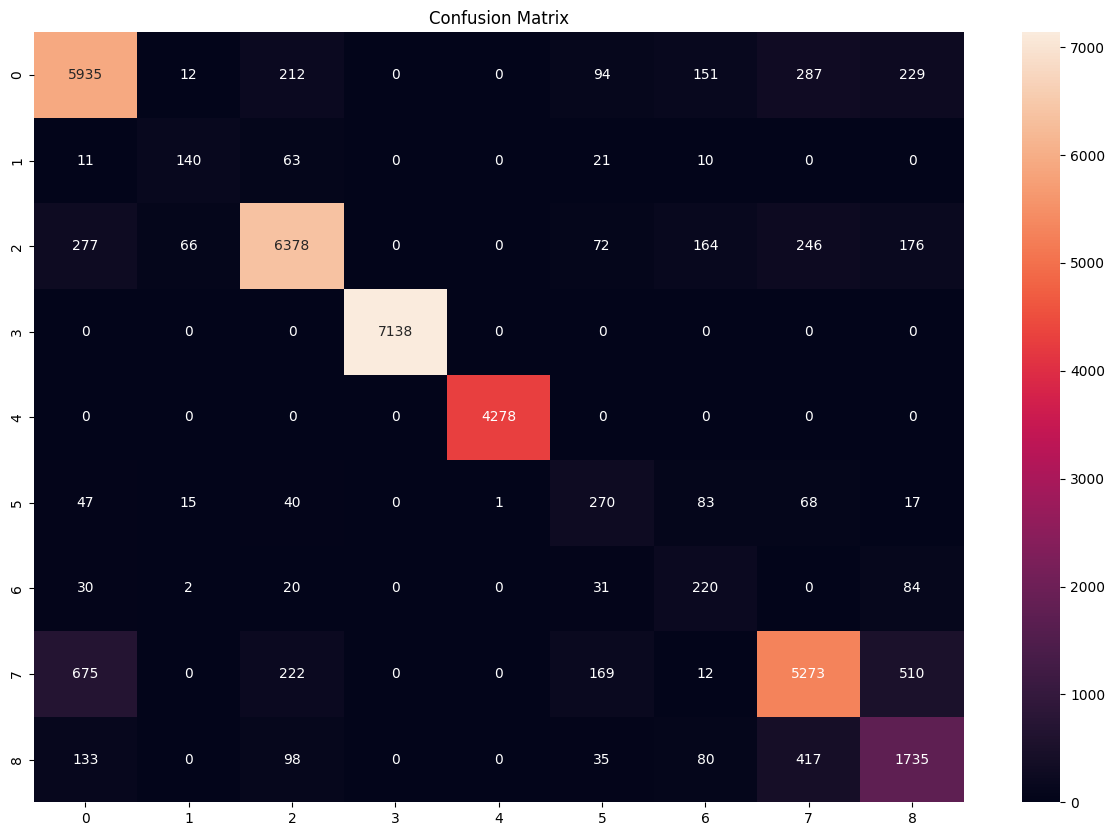

In [122]:
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.show()

# Classification Report

In [123]:
clr=classification_report(y_pred,y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      6920
           1       0.60      0.57      0.58       245
           2       0.91      0.86      0.89      7379
           3       1.00      1.00      1.00      7138
           4       1.00      1.00      1.00      4278
           5       0.39      0.50      0.44       541
           6       0.31      0.57      0.40       387
           7       0.84      0.77      0.80      6861
           8       0.63      0.69      0.66      2498

    accuracy                           0.87     36247
   macro avg       0.72      0.76      0.73     36247
weighted avg       0.87      0.87      0.87     36247

